# Cat Meow Classification
#### Source: https://www.kaggle.com/andrewmvd/cat-meow-classification

Naming convention for files -> CNNNNNBBSSOOOOO_RXX, where:

* C = emission context (values: B = brushing; F = waiting for food; I: isolation in an unfamiliar environment);
* NNNNN = cat’s unique ID;
* BB = breed (values: MC = Maine Coon; EU: European Shorthair);
* SS = sex (values: FI = female, intact; FN: female, neutered; MI: male, intact; MN: male, neutered);
*OOOOO = cat owner’s unique ID;
* R = recording session (values: 1, 2 or 3)
* XX = vocalization counter (values: 01..99)


In [1]:
import os
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import librosa
from PIL import Image

## Data Processing Part

#### Listing files in Data_Cat-Meow-Classification directory

In [2]:
cats=os.listdir("Data_Cat-Meow-Classification")
cats

['B_ANI01_MC_FN_SIM01_101.wav',
 'B_ANI01_MC_FN_SIM01_102.wav',
 'B_ANI01_MC_FN_SIM01_103.wav',
 'B_ANI01_MC_FN_SIM01_301.wav',
 'B_ANI01_MC_FN_SIM01_302.wav',
 'B_ANI01_MC_FN_SIM01_303.wav',
 'B_BAC01_MC_MN_SIM01_101.wav',
 'B_BAC01_MC_MN_SIM01_102.wav',
 'B_BAC01_MC_MN_SIM01_103.wav',
 'B_BAC01_MC_MN_SIM01_202.wav',
 'B_BAC01_MC_MN_SIM01_301.wav',
 'B_BAC01_MC_MN_SIM01_303.wav',
 'B_BRA01_MC_MN_SIM01_101.wav',
 'B_BRA01_MC_MN_SIM01_104.wav',
 'B_BRA01_MC_MN_SIM01_105.wav',
 'B_BRA01_MC_MN_SIM01_106.wav',
 'B_BRA01_MC_MN_SIM01_301.wav',
 'B_BRA01_MC_MN_SIM01_302.wav',
 'B_BRA01_MC_MN_SIM01_303.wav',
 'B_BRI01_MC_FI_SIM01_101.wav',
 'B_BRI01_MC_FI_SIM01_102.wav',
 'B_BRI01_MC_FI_SIM01_201.wav',
 'B_BRI01_MC_FI_SIM01_202.wav',
 'B_BRI01_MC_FI_SIM01_301.wav',
 'B_BRI01_MC_FI_SIM01_302.wav',
 'B_BRI01_MC_FI_SIM01_303.wav',
 'B_CAN01_EU_FN_GIA01_101.wav',
 'B_CAN01_EU_FN_GIA01_102.wav',
 'B_CAN01_EU_FN_GIA01_103.wav',
 'B_CAN01_EU_FN_GIA01_104.wav',
 'B_CAN01_EU_FN_GIA01_105.wav',
 'B_CAN0

#### Finding number of tracks

In [3]:
len(cats)

440

#### Extracting data from files

In [4]:
def process_cats_to_dataframe(cats):

    # iterating through each file geting filename (which will be ID) and extracted cat features using split
    cat_list=[[cat] + cat.split(".")[0].split("_") for cat in cats]

    # returning DtatFrame
    return pd.DataFrame(cat_list, columns=["Filename", "Emission_Context", "Cat_ID", "Breed", "Sex", "Cat_Owner_ID", "Recording_Session"])

In [5]:
cats_df = process_cats_to_dataframe(cats)
cats_df

,Filename,Emission_Context,Cat_ID,Breed,Sex,Cat_Owner_ID,Recording_Session
0,B_ANI01_MC_FN_SIM01_101.wav,B,ANI01,MC,FN,SIM01,101
1,B_ANI01_MC_FN_SIM01_102.wav,B,ANI01,MC,FN,SIM01,102
2,B_ANI01_MC_FN_SIM01_103.wav,B,ANI01,MC,FN,SIM01,103
3,B_ANI01_MC_FN_SIM01_301.wav,B,ANI01,MC,FN,SIM01,301
4,B_ANI01_MC_FN_SIM01_302.wav,B,ANI01,MC,FN,SIM01,302
...,...,...,...,...,...,...,...
435,I_WHO01_MC_FI_SIM01_114.wav,I,WHO01,MC,FI,SIM01,114
436,I_WHO01_MC_FI_SIM01_115.wav,I,WHO01,MC,FI,SIM01,115
437,I_WHO01_MC_FI_SIM01_116.wav,I,WHO01,MC,FI,SIM01,116
438,I_WHO01_MC_FI_SIM01_201.wav,I,WHO01,MC,FI,SIM01,201


#### Writing DataFrame to csv

In [6]:
cats_df.to_csv("Data_Cat-Meow-Classification-Cats.csv", index=False)

### Spectrograms

#### Creating spectrograms for each wav file

In [7]:
def cats_wav_to_specgram(cats):
    # generating directory to hold spectrograms if it doesn't exit
    pathlib.Path("./Data_Cat-Meow-Img").mkdir(exist_ok=True)

    for filename in cats:
        # path to file
        file = f'Data_Cat-Meow-Classification/{filename}'
        # reading file
        audio, sr = librosa.load(file, mono=True)
        # calculating and plotting spectrogram
        plt.specgram(audio, NFFT=2048, Fs=2, noverlap=128, cmap="inferno", scale="dB")
        plt.axis("off")
        # saving spectrogram in directory
        plt.savefig(f'./Data_Cat-Meow-Img/{filename[:-4]}.png')
        # clearing figure for new image
        plt.clf()

In [8]:
cats_wav_to_specgram(cats)

C:\Users\6trze\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


<Figure size 432x288 with 0 Axes>

#### Showing spectrogram of first image

(-0.5, 431.5, 287.5, -0.5)

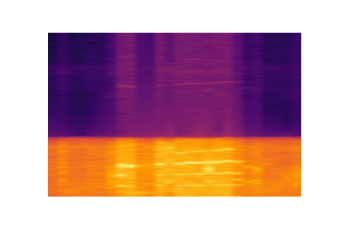

In [9]:
img_path = f'./Data_Cat-Meow-Img/{os.listdir("./Data_Cat-Meow-Img")[0]}'
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')

### Calculating sound statistics for each file

#### Creating DataFrame to hold sound statistcs
* RMS - Root Mean Squared
* Chroma STFT - vector indicating how much energy of each pitch (C, C#, D, ..., B) is present in signal
* Spectral Centroid - indicates where center of mass of signal is located
* Spectral Bandwidth - indicates diffrence between lower and upper frequencies of continous band of frequencies
* Spectral Roloff - indicates frequency at which high frequencies decline to 0
* Zero-Crossing Rate - measures smoothness of signal

In [10]:
def cats_wav_to_features_dataframe(cats):
    cat_list = []

    for filename in cats:
        # path to file
        file = f'Data_Cat-Meow-Classification/{filename}'
        # reading file
        audio, sr = librosa.load(file, mono=True)

        #features
        rms = librosa.feature.rms(y=audio)
        chroma_stft = librosa.feature.chroma_stft(y=audio, sr=sr)
        spec_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
        spec_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
        spec_roloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y=audio)

        # grabbing means of each feature
        cat = [filename, np.mean(rms), np.mean(chroma_stft), np.mean(spec_centroid), np.mean(spec_bandwidth), np.mean(spec_roloff), np.mean(zcr)]

        cat_list.append(cat)
    
    # returning DataFrame with filename and calculated means of features
    return pd.DataFrame(cat_list, columns=["Filename", "RMS", "Chroma_STFT", "Spectral_Centroid", "Spectral_Bandwidth", "Spectral_Roloff", "Zero_Crossing_Rate"])

In [11]:
df = cats_wav_to_features_dataframe(cats)
df

,Filename,RMS,Chroma_STFT,Spectral_Centroid,Spectral_Bandwidth,Spectral_Roloff,Zero_Crossing_Rate
0,B_ANI01_MC_FN_SIM01_101.wav,0.054480,0.375909,1707.714547,852.376527,2540.047940,0.163372
1,B_ANI01_MC_FN_SIM01_102.wav,0.004253,0.594699,1527.240720,928.602006,2634.344286,0.134175
2,B_ANI01_MC_FN_SIM01_103.wav,0.008073,0.476229,1597.103459,921.940298,2637.127216,0.151386
3,B_ANI01_MC_FN_SIM01_301.wav,0.021183,0.436710,1681.916888,877.889918,2624.036133,0.153294
4,B_ANI01_MC_FN_SIM01_302.wav,0.006711,0.536979,1573.903089,968.035926,2793.835227,0.146760
...,...,...,...,...,...,...,...
435,I_WHO01_MC_FI_SIM01_114.wav,0.031271,0.439976,1549.469086,959.971660,2748.516244,0.125942
436,I_WHO01_MC_FI_SIM01_115.wav,0.033841,0.418833,1627.320678,963.352963,2807.194407,0.135319
437,I_WHO01_MC_FI_SIM01_116.wav,0.037435,0.415613,1533.723133,967.494816,2825.530740,0.115505
438,I_WHO01_MC_FI_SIM01_201.wav,0.043118,0.385446,1635.612155,965.360239,2781.372070,0.140001


#### Writing DataFrame to csv

In [12]:
df.to_csv("./Data_Cat-Meow-Classification-Features.csv", index=False )

### Combining both dataframes

#### Reading files

In [2]:
features_df = pd.read_csv("Data_Cat-Meow-Classification-Features.csv")
features_df

,Filename,RMS,Chroma_STFT,Spectral_Centroid,Spectral_Bandwidth,Spectral_Roloff,Zero_Crossing_Rate
0,B_ANI01_MC_FN_SIM01_101.wav,0.054480,0.375909,1707.714547,852.376527,2540.047940,0.163372
1,B_ANI01_MC_FN_SIM01_102.wav,0.004253,0.594699,1527.240720,928.602006,2634.344286,0.134175
2,B_ANI01_MC_FN_SIM01_103.wav,0.008073,0.476229,1597.103459,921.940298,2637.127216,0.151386
3,B_ANI01_MC_FN_SIM01_301.wav,0.021183,0.436710,1681.916888,877.889918,2624.036133,0.153294
4,B_ANI01_MC_FN_SIM01_302.wav,0.006711,0.536979,1573.903089,968.035926,2793.835227,0.146760
...,...,...,...,...,...,...,...
435,I_WHO01_MC_FI_SIM01_114.wav,0.031271,0.439976,1549.469086,959.971660,2748.516244,0.125942
436,I_WHO01_MC_FI_SIM01_115.wav,0.033841,0.418833,1627.320678,963.352963,2807.194407,0.135319
437,I_WHO01_MC_FI_SIM01_116.wav,0.037435,0.415613,1533.723133,967.494816,2825.530740,0.115505
438,I_WHO01_MC_FI_SIM01_201.wav,0.043118,0.385446,1635.612155,965.360239,2781.372070,0.140001


In [3]:
cats_df = pd.read_csv("Data_Cat-Meow-Classification-Cats.csv")
cats_df

,Filename,Emission_Context,Cat_ID,Breed,Sex,Cat_Owner_ID,Recording_Session
0,B_ANI01_MC_FN_SIM01_101.wav,B,ANI01,MC,FN,SIM01,101
1,B_ANI01_MC_FN_SIM01_102.wav,B,ANI01,MC,FN,SIM01,102
2,B_ANI01_MC_FN_SIM01_103.wav,B,ANI01,MC,FN,SIM01,103
3,B_ANI01_MC_FN_SIM01_301.wav,B,ANI01,MC,FN,SIM01,301
4,B_ANI01_MC_FN_SIM01_302.wav,B,ANI01,MC,FN,SIM01,302
...,...,...,...,...,...,...,...
435,I_WHO01_MC_FI_SIM01_114.wav,I,WHO01,MC,FI,SIM01,114
436,I_WHO01_MC_FI_SIM01_115.wav,I,WHO01,MC,FI,SIM01,115
437,I_WHO01_MC_FI_SIM01_116.wav,I,WHO01,MC,FI,SIM01,116
438,I_WHO01_MC_FI_SIM01_201.wav,I,WHO01,MC,FI,SIM01,201


#### Copying datasets to be able to quickly revert changes if necessary without need to reread file

In [4]:
features_data = features_df.copy()
features_data

,Filename,RMS,Chroma_STFT,Spectral_Centroid,Spectral_Bandwidth,Spectral_Roloff,Zero_Crossing_Rate
0,B_ANI01_MC_FN_SIM01_101.wav,0.054480,0.375909,1707.714547,852.376527,2540.047940,0.163372
1,B_ANI01_MC_FN_SIM01_102.wav,0.004253,0.594699,1527.240720,928.602006,2634.344286,0.134175
2,B_ANI01_MC_FN_SIM01_103.wav,0.008073,0.476229,1597.103459,921.940298,2637.127216,0.151386
3,B_ANI01_MC_FN_SIM01_301.wav,0.021183,0.436710,1681.916888,877.889918,2624.036133,0.153294
4,B_ANI01_MC_FN_SIM01_302.wav,0.006711,0.536979,1573.903089,968.035926,2793.835227,0.146760
...,...,...,...,...,...,...,...
435,I_WHO01_MC_FI_SIM01_114.wav,0.031271,0.439976,1549.469086,959.971660,2748.516244,0.125942
436,I_WHO01_MC_FI_SIM01_115.wav,0.033841,0.418833,1627.320678,963.352963,2807.194407,0.135319
437,I_WHO01_MC_FI_SIM01_116.wav,0.037435,0.415613,1533.723133,967.494816,2825.530740,0.115505
438,I_WHO01_MC_FI_SIM01_201.wav,0.043118,0.385446,1635.612155,965.360239,2781.372070,0.140001


In [5]:
cats_data = cats_df.copy()
cats_data

,Filename,Emission_Context,Cat_ID,Breed,Sex,Cat_Owner_ID,Recording_Session
0,B_ANI01_MC_FN_SIM01_101.wav,B,ANI01,MC,FN,SIM01,101
1,B_ANI01_MC_FN_SIM01_102.wav,B,ANI01,MC,FN,SIM01,102
2,B_ANI01_MC_FN_SIM01_103.wav,B,ANI01,MC,FN,SIM01,103
3,B_ANI01_MC_FN_SIM01_301.wav,B,ANI01,MC,FN,SIM01,301
4,B_ANI01_MC_FN_SIM01_302.wav,B,ANI01,MC,FN,SIM01,302
...,...,...,...,...,...,...,...
435,I_WHO01_MC_FI_SIM01_114.wav,I,WHO01,MC,FI,SIM01,114
436,I_WHO01_MC_FI_SIM01_115.wav,I,WHO01,MC,FI,SIM01,115
437,I_WHO01_MC_FI_SIM01_116.wav,I,WHO01,MC,FI,SIM01,116
438,I_WHO01_MC_FI_SIM01_201.wav,I,WHO01,MC,FI,SIM01,201


#### Merging datasets

In [6]:
data = pd.merge(left=features_data, right=cats_data, on="Filename")
data

,Filename,RMS,Chroma_STFT,Spectral_Centroid,Spectral_Bandwidth,Spectral_Roloff,Zero_Crossing_Rate,Emission_Context,Cat_ID,Breed,Sex,Cat_Owner_ID,Recording_Session
0,B_ANI01_MC_FN_SIM01_101.wav,0.054480,0.375909,1707.714547,852.376527,2540.047940,0.163372,B,ANI01,MC,FN,SIM01,101
1,B_ANI01_MC_FN_SIM01_102.wav,0.004253,0.594699,1527.240720,928.602006,2634.344286,0.134175,B,ANI01,MC,FN,SIM01,102
2,B_ANI01_MC_FN_SIM01_103.wav,0.008073,0.476229,1597.103459,921.940298,2637.127216,0.151386,B,ANI01,MC,FN,SIM01,103
3,B_ANI01_MC_FN_SIM01_301.wav,0.021183,0.436710,1681.916888,877.889918,2624.036133,0.153294,B,ANI01,MC,FN,SIM01,301
4,B_ANI01_MC_FN_SIM01_302.wav,0.006711,0.536979,1573.903089,968.035926,2793.835227,0.146760,B,ANI01,MC,FN,SIM01,302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,I_WHO01_MC_FI_SIM01_114.wav,0.031271,0.439976,1549.469086,959.971660,2748.516244,0.125942,I,WHO01,MC,FI,SIM01,114
436,I_WHO01_MC_FI_SIM01_115.wav,0.033841,0.418833,1627.320678,963.352963,2807.194407,0.135319,I,WHO01,MC,FI,SIM01,115
437,I_WHO01_MC_FI_SIM01_116.wav,0.037435,0.415613,1533.723133,967.494816,2825.530740,0.115505,I,WHO01,MC,FI,SIM01,116
438,I_WHO01_MC_FI_SIM01_201.wav,0.043118,0.385446,1635.612155,965.360239,2781.372070,0.140001,I,WHO01,MC,FI,SIM01,201


## Machine Learning Part

Since our data is pretty small, it's probably better to use some machine learning classification algorithms (KNN, Naive Bayes, Decision Trees or Random Forest).

#### Importing libraries

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

#### Grabbing features and target

In [8]:
dataset = data[['RMS', 'Chroma_STFT', 'Spectral_Centroid','Spectral_Bandwidth', 'Spectral_Roloff', 'Zero_Crossing_Rate','Emission_Context']]
dataset

,RMS,Chroma_STFT,Spectral_Centroid,Spectral_Bandwidth,Spectral_Roloff,Zero_Crossing_Rate,Emission_Context
0,0.054480,0.375909,1707.714547,852.376527,2540.047940,0.163372,B
1,0.004253,0.594699,1527.240720,928.602006,2634.344286,0.134175,B
2,0.008073,0.476229,1597.103459,921.940298,2637.127216,0.151386,B
3,0.021183,0.436710,1681.916888,877.889918,2624.036133,0.153294,B
4,0.006711,0.536979,1573.903089,968.035926,2793.835227,0.146760,B
...,...,...,...,...,...,...,...
435,0.031271,0.439976,1549.469086,959.971660,2748.516244,0.125942,I
436,0.033841,0.418833,1627.320678,963.352963,2807.194407,0.135319,I
437,0.037435,0.415613,1533.723133,967.494816,2825.530740,0.115505,I
438,0.043118,0.385446,1635.612155,965.360239,2781.372070,0.140001,I


#### Spliting set to X and y

In [19]:
X = dataset.drop("Emission_Context", axis=1).values
y = dataset["Emission_Context"].values

#### Splitting data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=97)

#### Scaling X features

Certain algorithms such as KNN need feature scaling.

In [12]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

#### Defining acuuracy function

In [21]:
def accuracy(y_test, y_pred):
    return np.sum(y_test==y_pred)/len(y_test)

### KNN

In [22]:
knn = KNeighborsClassifier(n_neighbors=len(np.unique(y_train)))
knn.fit(X_train_scaled, y_train)
knn_predictions=knn.predict(X_test_scaled)

In [34]:
print(f"Accuracy: {accuracy(y_test, knn_predictions)}")
print(classification_report(y_test, knn_predictions))

Accuracy: 0.5795454545454546
              precision    recall  f1-score   support

           B       0.47      0.61      0.53        28
           F       0.57      0.19      0.29        21
           I       0.67      0.77      0.71        39

    accuracy                           0.58        88
   macro avg       0.57      0.52      0.51        88
weighted avg       0.58      0.58      0.55        88



### Naive Bayes

In [25]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predictions=gnb.predict(X_test)

In [33]:
print(f"Accuracy: {accuracy(y_test, gnb_predictions)}")
print(classification_report(y_test, gnb_predictions))

Accuracy: 0.48863636363636365
              precision    recall  f1-score   support

           B       0.54      0.25      0.34        28
           F       0.38      0.43      0.40        21
           I       0.53      0.69      0.60        39

    accuracy                           0.49        88
   macro avg       0.48      0.46      0.45        88
weighted avg       0.50      0.49      0.47        88



### Decision Trees

In [27]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_predictions=dtree.predict(X_test)

In [32]:
print(f"Accuracy: {accuracy(y_test, dtree_predictions)}")
print(classification_report(y_test, dtree_predictions))

Accuracy: 0.5681818181818182
              precision    recall  f1-score   support

           B       0.39      0.50      0.44        28
           F       0.64      0.43      0.51        21
           I       0.71      0.69      0.70        39

    accuracy                           0.57        88
   macro avg       0.58      0.54      0.55        88
weighted avg       0.59      0.57      0.57        88



### Random Forest

In [29]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_predictions=rfc.predict(X_test)

In [31]:
print(f"Accuracy: {accuracy(y_test, rfc_predictions)}")
print(classification_report(y_test, rfc_predictions))

Accuracy: 0.6363636363636364
              precision    recall  f1-score   support

           B       0.53      0.57      0.55        28
           F       0.70      0.33      0.45        21
           I       0.69      0.85      0.76        39

    accuracy                           0.64        88
   macro avg       0.64      0.58      0.59        88
weighted avg       0.64      0.64      0.62        88



Results are not very good. Most probably because dataset is pretty small. But let's try using Grid Search to maybe find better models.

## Grid Search
### KNN

In [53]:
knn = KNeighborsClassifier(n_neighbors=len(np.unique(y_train)))
parameters={"weights":["uniform", "distance"], "leaf_size":[10, 20,30, 40], "p":[2,3,4]}
gscv_knn = GridSearchCV(knn, parameters, verbose=1)

gscv_knn.fit(X_train_scaled, y_train)

print(gscv_knn.best_estimator_)
knn_predictions=gscv_knn.predict(X_test_scaled)

print(f"Accuracy: {accuracy(y_test, knn_predictions)}")
print(classification_report(y_test, knn_predictions))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
KNeighborsClassifier(leaf_size=10, n_neighbors=3, p=3, weights='distance')
Accuracy: 0.5568181818181818
              precision    recall  f1-score   support

           B       0.48      0.43      0.45        28
           F       0.40      0.29      0.33        21
           I       0.65      0.79      0.71        39

    accuracy                           0.56        88
   macro avg       0.51      0.50      0.50        88
weighted avg       0.53      0.56      0.54        88



### Decision Trees

In [55]:
dtree = DecisionTreeClassifier()
parameters={"criterion":["gini", "entropy"], "splitter":["best", "random"], "min_samples_split":[2,4,8]}
gscv_dtree = GridSearchCV(dtree, parameters, verbose=1)

gscv_dtree.fit(X_train, y_train)

print(gscv_dtree.best_estimator_)
dtree_predictions=gscv_dtree.predict(X_test)

print(f"Accuracy: {accuracy(y_test, dtree_predictions)}")
print(classification_report(y_test, dtree_predictions))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
DecisionTreeClassifier(criterion='entropy')
Accuracy: 0.5454545454545454
              precision    recall  f1-score   support

           B       0.46      0.57      0.51        28
           F       0.43      0.43      0.43        21
           I       0.72      0.59      0.65        39

    accuracy                           0.55        88
   macro avg       0.53      0.53      0.53        88
weighted avg       0.57      0.55      0.55        88

